In [1]:
#!/usr/bin/env python3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols, glm

# 将数据集读入到pandas数据框中
wine = pd.read_csv('csv\winequality-both.csv', sep=',', header=0)
wine.columns = wine.columns.str.replace(' ', '_')
print(wine.head())

E:\IDE\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


  type  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0  red            7.4              0.70         0.00             1.9   
1  red            7.8              0.88         0.00             2.6   
2  red            7.8              0.76         0.04             2.3   
3  red           11.2              0.28         0.56             1.9   
4  red            7.4              0.70         0.00             1.9   

   chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65      9.8  

In [2]:
#显示所有变量的描述性统计量
print(wine.describe())

       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

In [3]:
#找出唯一值
print(sorted(wine.quality.unique()))

[3, 4, 5, 6, 7, 8, 9]


In [4]:
# 计算值的频率
print(wine.quality.value_counts())

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


In [5]:
# 按照葡萄酒类型显示质量的描述性统计量
print(wine.groupby('type')[['alcohol']].describe().unstack('type'))

                type 
alcohol  count  red      1599.000000
                white    4898.000000
         mean   red        10.422983
                white      10.514267
         std    red         1.065668
                white       1.230621
         min    red         8.400000
                white       8.000000
         25%    red         9.500000
                white       9.500000
         50%    red        10.200000
                white      10.400000
         75%    red        11.100000
                white      11.400000
         max    red        14.900000
                white      14.200000
dtype: float64


In [6]:
# 按照葡萄酒类型显示质量的特定分位数值
print(wine.groupby('type')[['quality']].quantile([0.25, 0.75]).unstack('type'))

     quality      
type     red white
0.25     5.0   5.0
0.75     6.0   6.0


In [7]:
# 计算所有变量的相关矩阵
print(wine.corr())

                      fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000          0.219008     0.324436   
volatile_acidity           0.219008          1.000000    -0.377981   
citric_acid                0.324436         -0.377981     1.000000   
residual_sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free_sulfur_dioxide       -0.282735         -0.352557     0.133126   
total_sulfur_dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity    

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


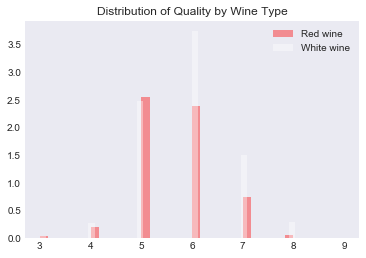

In [8]:
# 按照葡萄酒类型查看质量分布
red_wine = wine.loc[wine['type']=='red', 'quality']
white_wine = wine.loc[wine['type']=='white', 'quality']
sns.set_style("dark")
print(sns.distplot(red_wine, \
norm_hist=True, kde=False, color="red", label="Red wine", axlabel=False))
print(sns.distplot(white_wine, \
norm_hist=True, kde=False, color="white", label="White wine", axlabel=False))
plt.title("Distribution of Quality by Wine Type")
plt.legend()
plt.show()

In [9]:
# 检验红葡萄酒和白葡萄酒的平均质量是否有所不同
print(wine.groupby(['type'])[['quality']].agg(['std']))
tstat, pvalue, df = sm.stats.ttest_ind(red_wine, white_wine)
print('tstat: %.3f pvalue: %.4f' % (tstat, pvalue))

        quality
            std
type           
red    0.807569
white  0.885639
tstat: -9.686 pvalue: 0.0000


In [10]:
# 从红葡萄酒和白葡萄酒的数据中取出一个“小”样本来进行绘图
def take_sample(data_frame, replace=False, n=200):
    return data_frame.loc[np.random.choice(data_frame.index, replace=replace, size=n)]
reds_sample = take_sample(wine.loc[wine['type']=='red', :])
whites_sample = take_sample(wine.loc[wine['type']=='white', :])
wine_sample = pd.concat([reds_sample, whites_sample])
wine['in_sample'] = np.where(wine.index.isin(wine_sample.index), 1.,0.)
print(pd.crosstab(wine.in_sample, wine.type, margins=True))

type        red  white   All
in_sample                   
0.0        1399   4698  6097
1.0         200    200   400
All        1599   4898  6497


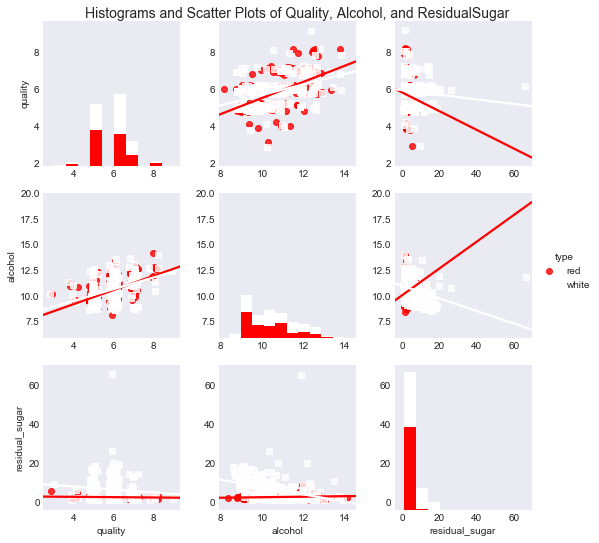

In [11]:
# 查看成对变量之间的关系
sns.set_style("dark")
g = sns.pairplot(wine_sample, kind='reg', plot_kws={"ci": False,\
"x_jitter": 0.25, "y_jitter": 0.25}, hue='type', diag_kind='hist',\
diag_kws={"bins": 10, "alpha": 1.0}, palette=dict(red="red", white="white"),\
markers=["o", "s"], vars=['quality', 'alcohol', 'residual_sugar'])
print(g)
plt.suptitle('Histograms and Scatter Plots of Quality, Alcohol, and Residual\
Sugar', fontsize=14, horizontalalignment='center', verticalalignment='top',\
x=0.5, y=0.999)
plt.show()

In [12]:
#  使用statsmodel 包来进行线性回归
my_formula = 'quality ~ alcohol + chlorides + citric_acid + density\
+ fixed_acidity + free_sulfur_dioxide + pH + residual_sugar + sulphates\
+ total_sulfur_dioxide + volatile_acidity'
lm = ols(my_formula, data=wine).fit()
print(lm.summary())
print("\nQuantities you can extract from the result:\n%s" % dir(lm))
print("\nCoefficients:\n%s" % lm.params)
print("\nCoefficient Std Errors:\n%s" % lm.bse)
print("\nAdj. R-squared:\n%.2f" % lm.rsquared_adj)
print("\nF-statistic: %.1f  P-value: %.2f" % (lm.fvalue, lm.f_pvalue))
print("\nNumber of obs: %d  Number of fitted values: %s" % (lm.nobs, len(lm.fittedvalues)))

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Thu, 09 Nov 2017   Prob (F-statistic):               0.00
Time:                        08:35:41   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627 

In [13]:
# 创建一个名为dependent_variable的序列来保存质量数据
dependent_variable = wine['quality']
# 创建一个名为independent variables的数据框
# 来保存初始的葡萄酒数据集中除quality、type和in_sample之外的所有变量
independent_variables = wine[wine.columns.difference(['quality', 'type',\
'in_sample'])]
# 对自变量进行标准化
# 对每个变量，在每个观测中减去变量的均值
# 并且使用结果除以变量的标准差
independent_variables_standardized = (independent_variables -\
independent_variables.mean()) / independent_variables.std()
# 将因变量quality作为一列添加到自变量数据框中
# 创建一个带有标准化自变量的
# 新数据集
wine_standardized = pd.concat([dependent_variable, independent_variables\
_standardized], axis=1)
# 重新进行线性回归，并查看一下摘要统计
lm_standardized = ols(my_formula, data=wine_standardized).fit()
print(lm_standardized.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Thu, 09 Nov 2017   Prob (F-statistic):               0.00
Time:                        08:36:32   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.8184 

In [14]:
# 使用葡萄酒数据集中的前10个观测创建10个“新”观测
# 新观测中只包含模型中使用的自变量
new_observations = wine.ix[wine.index.isin(range(10)), \
independent_variables.columns]
# 基于新观测中的葡萄酒特性预测质量评分
y_predicted = lm.predict(new_observations)
# 将预测值保留两位小数并打印到屏幕上
y_predicted_rounded = [round(score, 2) for score in y_predicted]
print(y_predicted_rounded)

[5.0, 4.9199999999999999, 5.0300000000000002, 5.6799999999999997, 5.0, 5.04, 5.0199999999999996, 5.2999999999999998, 5.2400000000000002, 5.6900000000000004]


E:\IDE\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
